In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


train=pd.read_csv('Dataset.csv')

X = train.iloc[:, 1:18].values
y = train.iloc[:, 18].values

train.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,1
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,1
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,1
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,1
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,1


In [75]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
for i in range(17):
    labelencoder_X_0 = LabelEncoder()
    X[:, i] = labelencoder_X_0.fit_transform(X[:, i])
X

array([[0, 0, 0, ..., 1, 0, 4],
       [1, 1, 0, ..., 1, 0, 4],
       [1, 0, 0, ..., 1, 0, 4],
       ...,
       [1, 0, 1, ..., 1, 0, 4],
       [1, 0, 0, ..., 0, 1, 4],
       [1, 1, 0, ..., 1, 1, 4]], dtype=object)

In [76]:
print(len(X[0]))

17


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train

array([[0, 0, 0, ..., 0, 0, 4],
       [1, 1, 1, ..., 0, 0, 4],
       [1, 1, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 4],
       [1, 1, 1, ..., 1, 0, 4],
       [1, 1, 0, ..., 0, 0, 4]], dtype=object)

In [78]:

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

X = X.astype(int)
X_train= X_train.astype(int)
X_test= X_test.astype(int)
chi2_features = SelectKBest(chi2) 
X_kbest_features_train = chi2_features.fit_transform(X_train, y_train)
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features_train.shape[1])
len(X[0])

Original feature number: 17
Reduced feature number: 10


17

In [79]:
X_kbest_features_test = chi2_features.fit_transform(X_test, y_test)
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features_test.shape[1])

Original feature number: 17
Reduced feature number: 10


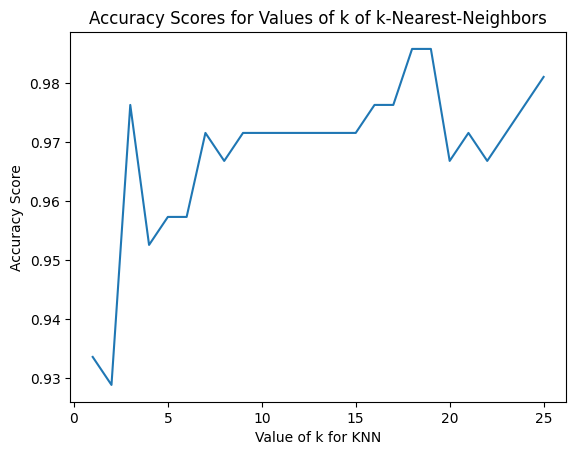

In [80]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()


In [81]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.995260663507109


C:\Users\ganga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)
print(knn.predict([[0,0,0,0,0,0,0,0,0,0,3,0,0,8,0,0,4]]))
print(knn.predict([[1,0,0,0,1,0,1,1,1,1,21,6,1,6,1,0,4]]))


[0]
[1]


In [83]:
X = X.astype(int)
X_train= X_train.astype(int)
X_test= X_test.astype(int)
chi2_features = SelectKBest(chi2, k=5) 
X_kbest_features_train = chi2_features.fit_transform(X_train, y_train)
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features_train.shape[1])


Original feature number: 17
Reduced feature number: 5


In [84]:
X_kbest_features_test = chi2_features.fit_transform(X_test, y_test)
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features_test.shape[1])

Original feature number: 17
Reduced feature number: 5


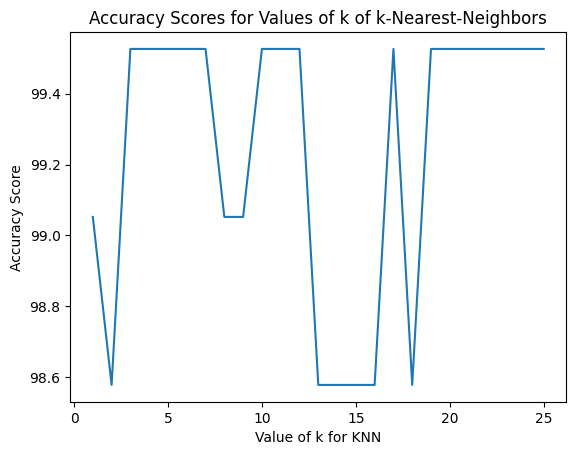

In [95]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_kbest_features_train, y_train)
    y_pred = knn.predict(X_kbest_features_test)
    scores.append(accuracy_score(y_test,y_pred)*100)
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()
    


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_kbest_features_train, y_train)


y_pred = logreg.predict(X_kbest_features_test)
print(metrics.accuracy_score(y_test, y_pred))
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)


print(knn.predict([[0,0,0,0,0,0,0,0,0,0,3,0,0,8,0,0,4]]))
print(knn.predict([[1,0,0,0,1,0,1,1,1,1,21,6,1,6,1,0,4]]))

In [86]:
X = X.astype(int)
X_train= X_train.astype(int)
X_test= X_test.astype(int)
chi2_features = SelectKBest(chi2, k=6) 
X_kbest_features_train = chi2_features.fit_transform(X_train, y_train)
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features_train.shape[1])

Original feature number: 17
Reduced feature number: 6


In [87]:
X_kbest_features_test = chi2_features.fit_transform(X_test, y_test)
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features_test.shape[1])

Original feature number: 17
Reduced feature number: 6


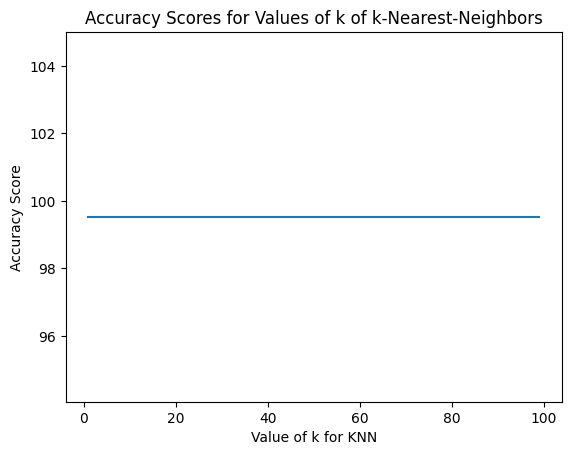

In [88]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

k_range = list(range(1,100))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_kbest_features_train, y_train)
    y_pred = knn.predict(X_kbest_features_test)
    scores.append(accuracy_score(y_test,y_pred)*100)
    
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()


In [89]:
X = X.astype(int)
X_train= X_train.astype(int)
X_test= X_test.astype(int)
chi2_features = SelectKBest(chi2, k=7) 
X_kbest_features_train = chi2_features.fit_transform(X_train, y_train)
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features_train.shape[1])



Original feature number: 17
Reduced feature number: 7


In [90]:
X_kbest_features_test = chi2_features.fit_transform(X_test, y_test)
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features_test.shape[1])

Original feature number: 17
Reduced feature number: 7


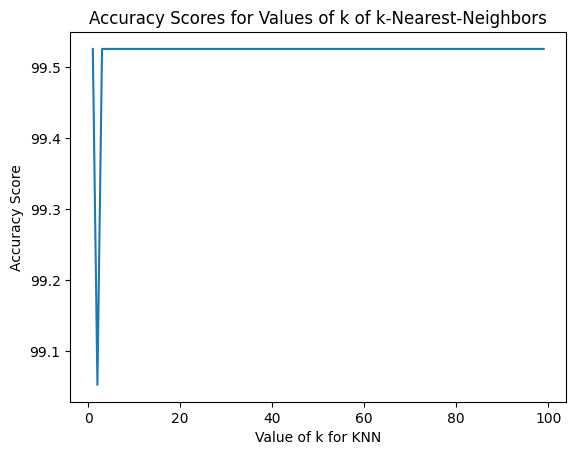

In [91]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

k_range = list(range(1,100))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_kbest_features_train, y_train)
    y_pred = knn.predict(X_kbest_features_test)
    scores.append(accuracy_score(y_test,y_pred)*100)
    
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [92]:
X = X.astype(int)
X_train= X_train.astype(int)
X_test= X_test.astype(int)
chi2_features = SelectKBest(chi2, k=8) 
X_kbest_features_train = chi2_features.fit_transform(X_train, y_train)
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features_train.shape[1])

Original feature number: 17
Reduced feature number: 8


In [93]:
X_kbest_features_test = chi2_features.fit_transform(X_test, y_test)
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features_test.shape[1])

Original feature number: 17
Reduced feature number: 8


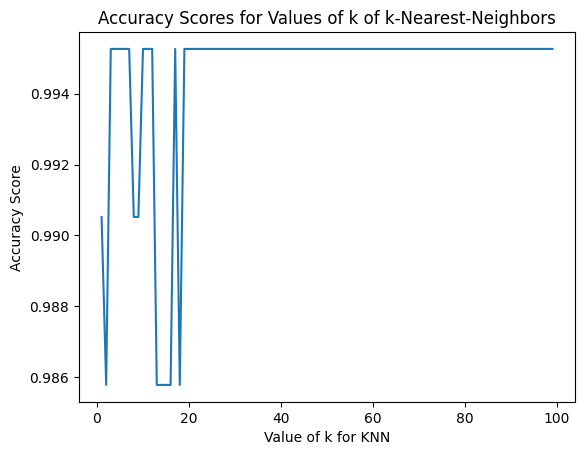

In [94]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

k_range = list(range(1,100))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_kbest_features_train, y_train)
    y_pred = knn.predict(X_kbest_features_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()